# **Assignment 4**

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

plt.style.use("seaborn-v0_8")


In [40]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
file_path = "/content/drive/MyDrive/CSSM502/Assignment 4/Dataset/GSS2022.dta"


In [43]:
import pandas as pd

gss = pd.read_stata(file_path)
gss.head()

gss.shape

gss.dtypes.head(20)




/tmp/ipython-input-2796457745.py:3: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  gss = pd.read_stata(file_path)


,0
year,category
id,int16
wrkstat,category
hrs1,category
hrs2,category
evwork,category
wrkslf,category
occ10,category
prestg10,category
indus10,category


In [44]:
gss.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3544 entries, 0 to 3543
Columns: 879 entries, year to wtssnrps_next
dtypes: category(854), float64(24), int16(1)
memory usage: 4.2 MB


In [45]:
gss.select_dtypes(include=['int', 'float']).columns


Index(['adoptus', 'clsrltv', 'frndfam', 'conhlth', 'hlthacc1', 'hlthacc2',
       'hlthacc3', 'hlthacc4', 'hlthweb', 'extraval1', 'cvdlvmus', 'cvdart',
       'cvdmov', 'cvdcreat', 'cvdrdg', 'cvdtour', 'cvdstmus', 'cvdarmus',
       'cvdstpo', 'cvdarpo', 'cvdclass', 'cvdpod', 'abbelief', 'covemply'],
      dtype='object')

In [47]:
gss['age'].head(10)


,age
0,72.0
1,80.0
2,57.0
3,23.0
4,62.0
5,27.0
6,20.0
7,47.0
8,31.0
9,72.0


In [48]:
gss['age'].dtype

CategoricalDtype(categories=[         18.0,          19.0,          20.0,          21.0,
                           22.0,          23.0,          24.0,          25.0,
                           26.0,          27.0,          28.0,          29.0,
                           30.0,          31.0,          32.0,          33.0,
                           34.0,          35.0,          36.0,          37.0,
                           38.0,          39.0,          40.0,          41.0,
                           42.0,          43.0,          44.0,          45.0,
                           46.0,          47.0,          48.0,          49.0,
                           50.0,          51.0,          52.0,          53.0,
                           54.0,          55.0,          56.0,          57.0,
                           58.0,          59.0,          60.0,          61.0,
                           62.0,          63.0,          64.0,          65.0,
                           66.0,          67.0,      

In [49]:
gss['age'].cat.categories[:10]

Index([18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0], dtype='object')

In [50]:
gss['age'] = gss['age'].replace('89 or older', pd.NA)
gss['age'] = pd.to_numeric(gss['age'])


/tmp/ipython-input-816076229.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  gss['age'] = gss['age'].replace('89 or older', pd.NA)


In [54]:
gss['educ'].head(10)
gss['educ'].dtype
gss['educ'].cat.categories


Index(['no formal schooling',                   1.0,                   2.0,
                         3.0,                   4.0,                   5.0,
                         6.0,                   7.0,                   8.0,
                         9.0,                  10.0,                  11.0,
                        12.0,                  13.0,                  14.0,
                        15.0,                  16.0,                  17.0,
                        18.0,                  19.0,                  20.0],
      dtype='object')

In [55]:
gss['educ'] = gss['educ'].cat.add_categories([0])

gss['educ'] = gss['educ'].mask(gss['educ'] == 'no formal schooling', 0)


In [56]:
gss['educ'] = pd.to_numeric(gss['educ'])


In [57]:
gss['educ'].describe()


,educ
count,3524.000000
mean,14.108116
std,2.893797
min,0.000000
25%,12.000000
50%,14.000000
75%,16.000000
max,20.000000


In [58]:
gss['realinc'].head(10)


,realinc
0,43600.0000
1,NaN
2,19620.0000
3,43600.0000
4,11990.0000
5,23980.0000
6,16350.0000
7,144835.4286
8,10355.0000
9,4905.0000


In [59]:
gss['realinc'].dtype


CategoricalDtype(categories=[             218.0,              872.0,             1526.0,
                              1962.0,             2398.0,             2834.0,
                              3270.0,             3924.0,             4905.0,
                              5995.0,             7085.0,             8175.0,
                              9265.0,            10355.0,            11990.0,
                             14170.0,            16350.0,            19620.0,
                             23980.0,            29430.0,            35970.0,
                             43600.0,            52320.0,            61040.0,
                             69760.0, 144835.42859999998],
, ordered=True, categories_dtype=float64)

In [60]:
gss['realinc'].cat.categories[:15]


Index([  218.0,   872.0,  1526.0,  1962.0,  2398.0,  2834.0,  3270.0,  3924.0,
        4905.0,  5995.0,  7085.0,  8175.0,  9265.0, 10355.0, 11990.0],
      dtype='float64')

In [61]:
gss['realinc'] = pd.to_numeric(gss['realinc'], errors='coerce')


In [62]:
gss['realinc'].describe()


,realinc
count,3110.000000
mean,38955.428758
std,40401.368809
min,218.000000
25%,11990.000000
50%,23980.000000
75%,43600.000000
max,144835.428600


In [63]:
analysis_df = gss[['age', 'educ', 'realinc', 'sex']].dropna()
analysis_df.shape


(2965, 4)

In [64]:
analysis_df[['age', 'educ', 'realinc']].describe()


,age,educ,realinc
count,2965.000000,2965.000000,2965.000000
mean,49.368634,14.186847,39180.157074
std,17.410113,2.890401,40599.495573
min,18.000000,0.000000,218.000000
25%,34.000000,12.000000,11990.000000
50%,49.000000,14.000000,23980.000000
75%,64.000000,16.000000,43600.000000
max,88.000000,20.000000,144835.428600


In [65]:
analysis_df[['age', 'educ', 'realinc']].median()


,0
age,49.0
educ,14.0
realinc,23980.0


In [66]:
analysis_df[['age', 'educ', 'realinc']].std()


,0
age,17.410113
educ,2.890401
realinc,40599.495573


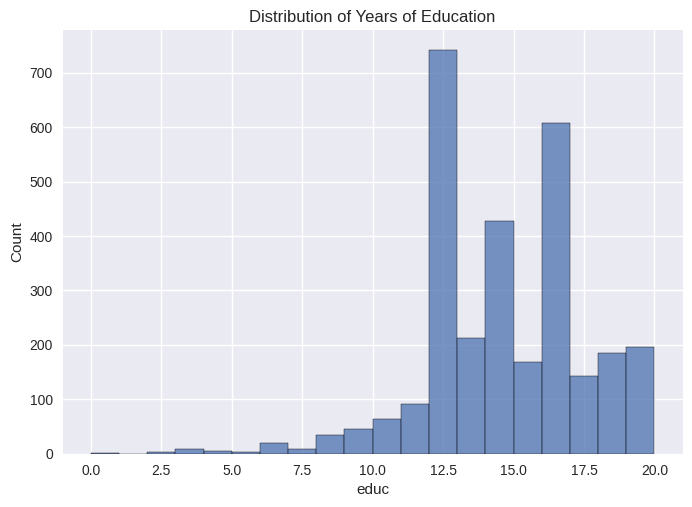

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(analysis_df['educ'], bins=20)
plt.title("Distribution of Years of Education")
plt.show()


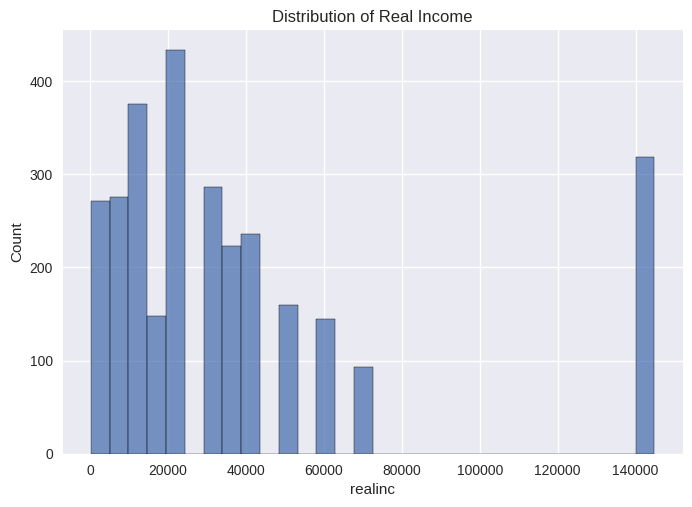

In [68]:
sns.histplot(analysis_df['realinc'], bins=30)
plt.title("Distribution of Real Income")
plt.show()


In [70]:
analysis_df['sex'].value_counts(dropna=False)


,count
sex,
female,1583
male,1382


In [71]:
analysis_df.groupby('sex')['educ'].count()


/tmp/ipython-input-3815106727.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  analysis_df.groupby('sex')['educ'].count()


,educ
sex,
male,1382
female,1583


In [72]:
from scipy import stats

male_educ = analysis_df[analysis_df['sex'] == 'male']['educ']
female_educ = analysis_df[analysis_df['sex'] == 'female']['educ']

stats.ttest_ind(male_educ, female_educ, equal_var=False)


TtestResult(statistic=np.float64(-0.2070374620677598), pvalue=np.float64(0.8359949805440078), df=np.float64(2931.6248496720823))

p-value = 0.836 > 0.05 so there is no statistically significant difference in years of education between men and women in the sample.

In [73]:
analysis_df[['educ', 'age', 'realinc']].corr()


,educ,age,realinc
educ,1.000000,0.035726,0.361586
age,0.035726,1.000000,-0.003513
realinc,0.361586,-0.003513,1.000000


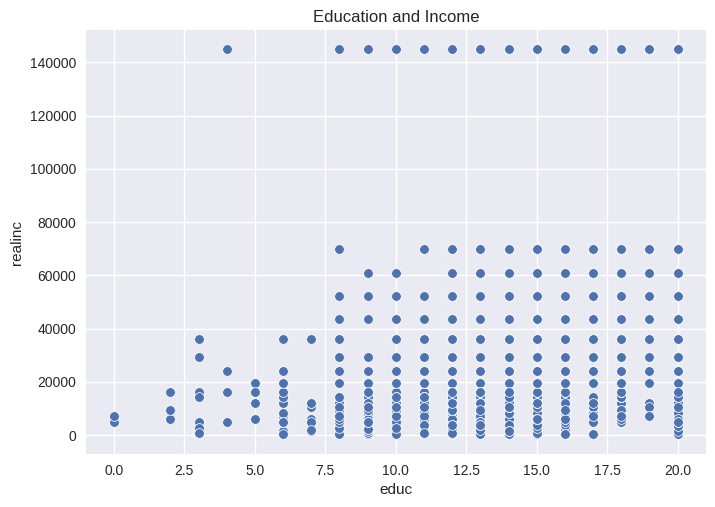

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='educ', y='realinc', data=analysis_df)
plt.title("Education and Income")
plt.show()


In [75]:
analysis_df[['educ', 'age', 'realinc']].corr()


,educ,age,realinc
educ,1.000000,0.035726,0.361586
age,0.035726,1.000000,-0.003513
realinc,0.361586,-0.003513,1.000000


Education shows a moderate positive correlation with income, while age exhibits almost no linear relationship with income.

In [76]:
import statsmodels.formula.api as smf

ols_model = smf.ols("realinc ~ educ + age", data=analysis_df).fit()
ols_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                realinc   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     223.3
Date:                Thu, 18 Dec 2025   Prob (F-statistic):           4.76e-91
Time:                        08:39:35   Log-Likelihood:                -35462.
No. Observations:                2965   AIC:                         7.093e+04
Df Residuals:                    2962   BIC:                         7.095e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -3.11e+04   3944.626     -7.883      0.000   -3.88e+04   -2.34e+04
educ        5087.2123    240.743     21.131      0.000    4615.172    5559.253
age          -38.3648     39.968     -0.960      0.337    -116.732      40.003
==============================================================================
Omnibus:                      821.352   Durbin-Watson:                   1.733
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1776.862
Skew:                           1.612   Prob(JB):                         0.00
Kurtosis:                       4.996   Cond. No.                         307.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Education has a positive and statistically significant effect on income.
One additional year of education is associated with approximately $5,100 higher annual income, holding age constant.

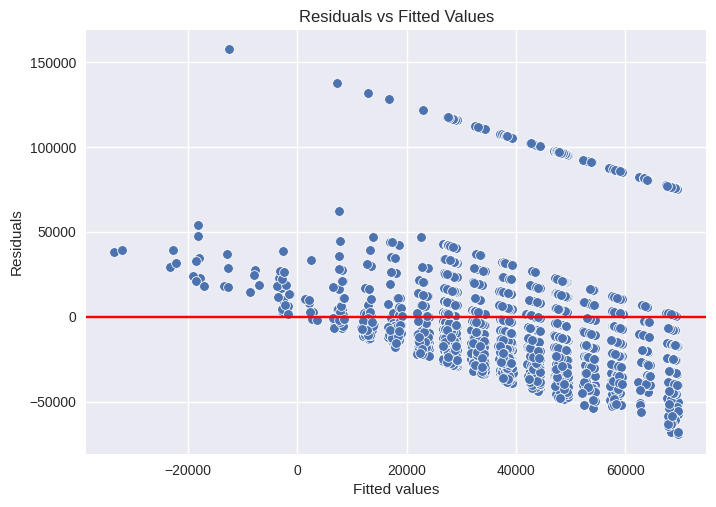

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=ols_model.fittedvalues, y=ols_model.resid)
plt.axhline(0, color='red')
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()


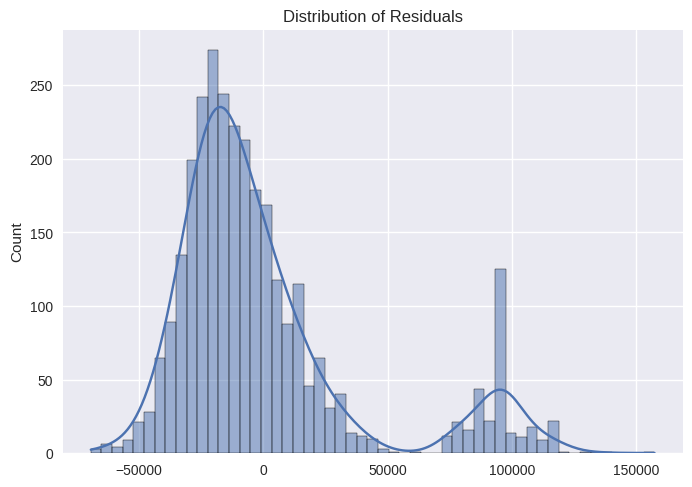

In [78]:
sns.histplot(ols_model.resid, kde=True)
plt.title("Distribution of Residuals")
plt.show()


The main variables are education, age, and income. Before the analysis, the data were cleaned and prepared. The category “89 or older” in the age was removed because it does not represent an exact value. Education was measured in years of schooling. And there is also option that no formal schooling. So no formal schooling were coded as zero years. Income was converted to real income values for numerical analysis.

Descriptive statistics show that;
- education varies across respondents
- Most people have between 12 and 16 years of education
- Income is not evenly distributed
- Many respondents have low or middle income, while a small number have very high income

A t-test was used to compare education levels between male and female. It is important to use "male" and "female" becasue first think that likely do is coding man and woman as a 0 and 1. The results show no statistically significant difference. On average, men and women have similar years of education.

Correlation analysis shows a positive relationship between education and income. Higher education is usually linked to higher income. Age shows almost no linear relationship with income. An OLS regression was then estimated. The results show that education has a strong and statistically significant effect on income. One additional year of education is associated with about $5,100 higher income, holding age constant. Age is not a significant predictor once education is included. The model explains a limited part of income differences, which is expected. Diagnostic checks show that residuals are centered around zero, but variance increases for higher income levels. Residuals are not perfectly normal. The results can be considered reliable.